##  Boosting

1. Module and Environment set up
2. Data import and understanding
3. Missing value treatment
4. Feature transformation
5. AdaBoosting modelling and validation with different parameters
6. GBM modelling and validation with different parameters
7. XGBoosting Modelling and validation with different parameters

Chethan MK

### Module and Environment

In [1]:
# Import Libraries required for the experiment
from sklearn import datasets
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import QuantileTransformer,MinMaxScaler,RobustScaler,StandardScaler
import random
import os
import warnings
import seaborn as sns
from sklearn import datasets
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier ,DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_selection import RFE
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import AdaBoostClassifier
#from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
from sklearn import tree
import collections
np.random.seed(132)

In [2]:
# Initiate Encoders which will be used for Categorical Variables
label_encoder = LabelEncoder()

# Prints all line without skipping
pd.set_option('display.max_rows', None)
# Prints all columns without skipping
pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')


In [3]:
os.getcwd()

'C:\\Users\\chethan mk\\Downloads\\AI&ML Training\\Boosting Techniques'

### Data Snapshot

In [4]:
# load the raw input dataset
bookings=pd.read_csv('C:\\Users\\chethan mk\\Downloads\\AI&ML Training\\Boosting Techniques\\hotel_bookings.csv - hotel_bookings.csv.csv')
bookings.head(10)


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,01-07-2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,01-07-2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,02-07-2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,02-07-2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,03-07-2015
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,03-07-2015
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,0,No Deposit,NaN,NaN,0,Transient,107.0,0,0,03-07-2015
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,0.0,0,FB,PRT,Direct,Direct,0,0,0,C,0,No Deposit,303.0,NaN,0,Transient,103.0,0,1,03-07-2015
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,0,No Deposit,240.0,NaN,0,Transient,82.0,0,1,06-05-2015
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,0.0,0,HB,PRT,Offline TA/TO,TA/TO,0,0,0,D,0,No Deposit,15.0,NaN,0,Transient,105.5,0,0,22-04-2015


In [5]:
bookings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 30 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [6]:
bookings.describe(include='all')

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
count,119390,119390.000000,119390.000000,119390.000000,119390,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390,118902,119390,119390,119390.000000,119390.000000,119390.000000,119390,119390.000000,119390,103050.000000,6797.000000,119390.000000,119390,119390.000000,119390.000000,119390.000000,119390
unique,2,NaN,NaN,NaN,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,177,8,5,NaN,NaN,NaN,10,NaN,3,NaN,NaN,NaN,4,NaN,NaN,NaN,926
top,City Hotel,NaN,NaN,NaN,August,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BB,PRT,Online TA,TA/TO,NaN,NaN,NaN,A,NaN,No Deposit,NaN,NaN,NaN,Transient,NaN,NaN,NaN,21-10-2015
freq,79330,NaN,NaN,NaN,13877,NaN,NaN,NaN,NaN,NaN,NaN,NaN,92310,48590,56477,97870,NaN,NaN,NaN,85994,NaN,104641,NaN,NaN,NaN,89613,NaN,NaN,NaN,1461
mean,NaN,0.370416,104.011416,2016.156554,NaN,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,NaN,NaN,NaN,NaN,0.031912,0.087118,0.137097,NaN,0.221124,NaN,86.693382,189.266735,2.321149,NaN,101.831122,0.062518,0.571363,NaN
std,NaN,0.482918,106.863097,0.707476,NaN,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,NaN,NaN,NaN,NaN,0.175767,0.844336,1.497437,NaN,0.652306,NaN,110.774548,131.655015,17.594721,NaN,50.535790,0.245291,0.792798,NaN
min,NaN,0.000000,0.000000,2015.000000,NaN,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,0.000000,NaN,1.000000,6.000000,0.000000,NaN,-6.380000,0.000000,0.000000,NaN
25%,NaN,0.000000,18.000000,2016.000000,NaN,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,0.000000,NaN,9.000000,62.000000,0.000000,NaN,69.290000,0.000000,0.000000,NaN
50%,NaN,0.000000,69.000000,2016.000000,NaN,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,0.000000,NaN,14.000000,179.000000,0.000000,NaN,94.575000,0.000000,0.000000,NaN
75%,NaN,1.000000,160.000000,2017.000000,NaN,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,0.000000,NaN,229.000000,270.000000,0.000000,NaN,126.000000,0.000000,1.000000,NaN


In [7]:
bookings.nunique()

hotel                                2
is_canceled                          2
lead_time                          479
arrival_date_year                    3
arrival_date_month                  12
arrival_date_week_number            53
arrival_date_day_of_month           31
stays_in_weekend_nights             17
stays_in_week_nights                35
adults                              14
children                             5
babies                               5
meal                                 5
country                            177
market_segment                       8
distribution_channel                 5
is_repeated_guest                    2
previous_cancellations              15
previous_bookings_not_canceled      73
reserved_room_type                  10
booking_changes                     21
deposit_type                         3
agent                              333
company                            352
days_in_waiting_list               128
customer_type            

In [8]:
#Assign Temporary Storage of the core dataset (For larger sets this step must be avoided)
temp = bookings.copy()

In [9]:
bookings.shape

(119390, 30)

In [10]:
temp.shape

(119390, 30)

In [11]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 30 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [12]:
temp.columns[[3,5,6,13,22,23,29]]

Index(['arrival_date_year', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'country', 'agent', 'company',
       'reservation_status_date'],
      dtype='object')

In [13]:
temp=temp.drop(temp.columns[[3,5,6,13,22,23,29]],axis=1)


Chethan Mk

### Missing Value Treatment

In [14]:
temp['deposit_type'].unique()

array(['No Deposit', 'Refundable', 'Non Refund'], dtype=object)

In [15]:
# Retrieve Columns that have Null Value 
null_columns=temp.columns[temp.isnull().any()]

# Identify Categorical Variables manually
temp1=temp.head()
temp1.iloc[:,[0,1,3,4,5,10,11,12,13,16,17,19,21]] = temp1.iloc[:,[0,1,3,4,5,10,11,12,13,16,17,19,21]].astype(str)


In [16]:
temp1.iloc[:,[0,1,3,4,5,10,11,12,13,16,17,19,21]].head()

,hotel,is_canceled,arrival_date_month,stays_in_weekend_nights,stays_in_week_nights,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,booking_changes,deposit_type,customer_type,required_car_parking_spaces
0,Resort Hotel,0,July,0,0,Direct,Direct,0,0,3,No Deposit,Transient,0
1,Resort Hotel,0,July,0,0,Direct,Direct,0,0,4,No Deposit,Transient,0
2,Resort Hotel,0,July,0,1,Direct,Direct,0,0,0,No Deposit,Transient,0
3,Resort Hotel,0,July,0,1,Corporate,Corporate,0,0,0,No Deposit,Transient,0
4,Resort Hotel,0,July,0,2,Online TA,TA/TO,0,0,0,No Deposit,Transient,0


In [17]:
print(null_columns)

Index(['children'], dtype='object')


In [18]:
categoric_variables = temp1.columns[temp1.dtypes=='object']

# Categorical Imputation
for i in range(0,len(categoric_variables)):
    temp[categoric_variables[i]]=temp[categoric_variables[i]].replace(np.nan,temp[categoric_variables[i]].mode()[0])
    temp[categoric_variables[i]]=temp[categoric_variables[i]].replace(to_replace ="NaN", value = temp[categoric_variables[i]].mode()[0])
    temp[categoric_variables[i]]=temp[categoric_variables[i]].replace(to_replace ="nan", value = temp[categoric_variables[i]].mode()[0])

    # Numeric Imputation
from sklearn.impute import SimpleImputer
mean_imp = SimpleImputer(missing_values=np.nan, strategy="mean")

# Mean Imputation for Numeric Variables
numeric_variables = set(temp.columns) - set(categoric_variables)
i=1
for i in range(0,len(numeric_variables)):
    if(temp.columns[i] in numeric_variables):
       temp.iloc[:,[i]] = mean_imp.fit_transform(temp.iloc[:,[i]])
       temp[temp.columns[i]]=temp[temp.columns[i]].replace(to_replace ="NaN",value =0)
       temp[temp.columns[i]]=temp[temp.columns[i]].replace(to_replace ="nan",value =0)
       temp[temp.columns[i]].fillna(0, inplace = True) 


In [19]:
# Retrieve Columns that have Null Value 
null_columns=temp.columns[temp.isnull().any()]
null_columns

Index([], dtype='object')

In [20]:
# Converting into string
temp['hotel'] = temp['hotel'].astype(str)
temp['arrival_date_month'] = temp['arrival_date_month'].astype(str)
temp['meal'] = temp['meal'].astype(str)
temp['market_segment'] = temp['market_segment'].astype(str)
temp['distribution_channel'] = temp['distribution_channel'].astype(str)
   
temp['is_repeated_guest'] = temp['is_repeated_guest'].astype(str)
temp['reserved_room_type'] = temp['reserved_room_type'].astype(str)
temp['deposit_type'] = temp['deposit_type'].astype(str)
temp['customer_type'] = temp['customer_type'].astype(str)
temp['is_canceled'] = temp['is_canceled'].astype(str)


Chethan mk


## EDA

In [21]:
num_data = temp[temp.columns[temp.dtypes!='object']]
num_data.head()

,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
0,342.0,0,0,2.0,0.0,0,0,0,3,0,0.0,0,0
1,737.0,0,0,2.0,0.0,0,0,0,4,0,0.0,0,0
2,7.0,0,1,1.0,0.0,0,0,0,0,0,75.0,0,0
3,13.0,0,1,1.0,0.0,0,0,0,0,0,75.0,0,0
4,14.0,0,2,2.0,0.0,0,0,0,0,0,98.0,0,1


### Feature Transformation

In [22]:
# Plotting All the Variables that are available in raw file
os.chdir('C:\\Users\\chethan mk\\Downloads\\AI&ML Training\\Boosting Techniques\\')
if not os.path.exists('Plots'):
    os.makedirs('Plots')
os.chdir('C:\\Users\\chethan mk\\Downloads\\AI&ML Training\\Boosting Techniques\\Plots\\')


lead_time
stays_in_weekend_nights
stays_in_week_nights
adults
children
babies
previous_cancellations
previous_bookings_not_canceled
booking_changes
days_in_waiting_list
adr
required_car_parking_spaces
total_of_special_requests


<Figure size 432x288 with 0 Axes>

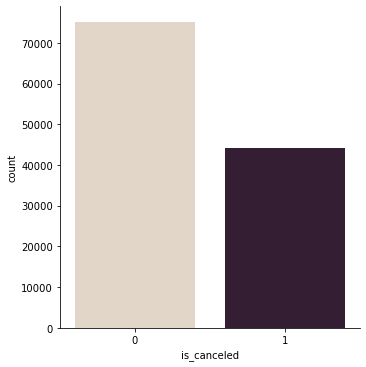

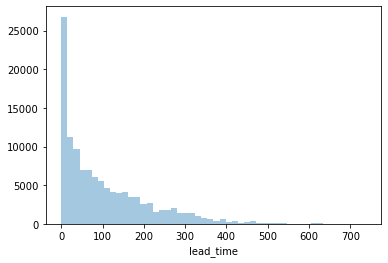

<Figure size 432x288 with 0 Axes>

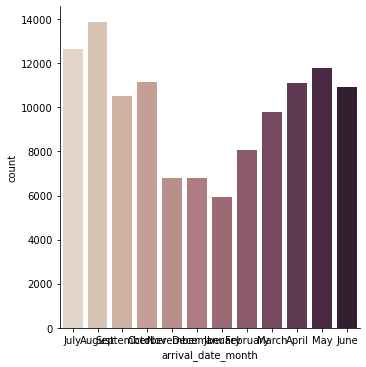

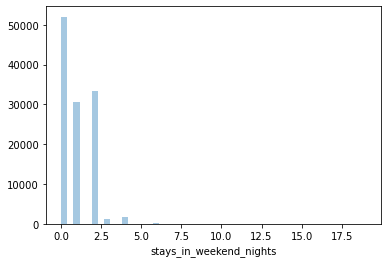

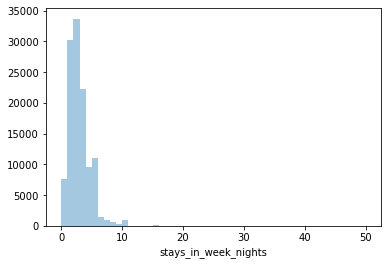

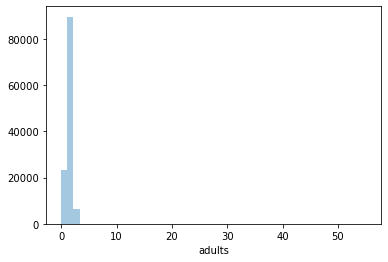

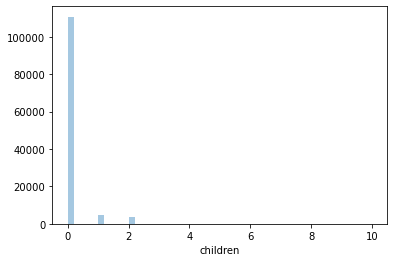

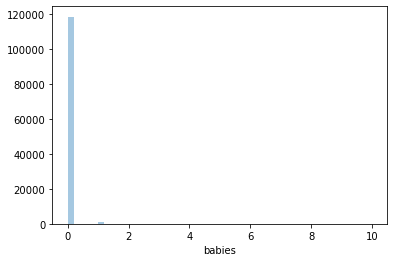

<Figure size 432x288 with 0 Axes>

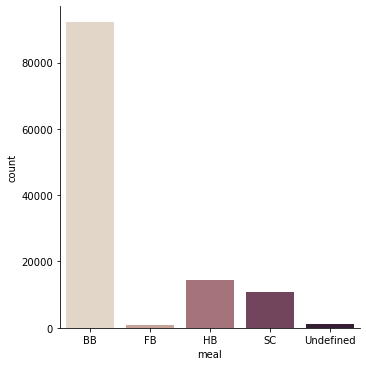

<Figure size 432x288 with 0 Axes>

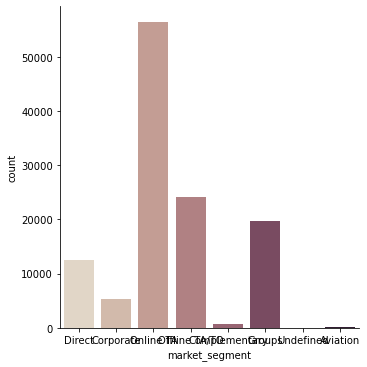

<Figure size 432x288 with 0 Axes>

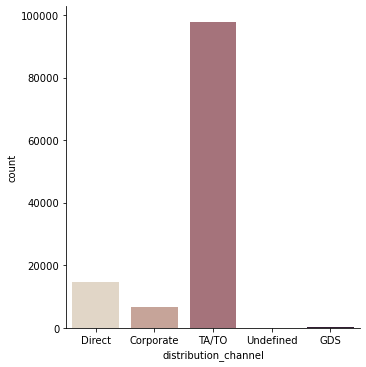

<Figure size 432x288 with 0 Axes>

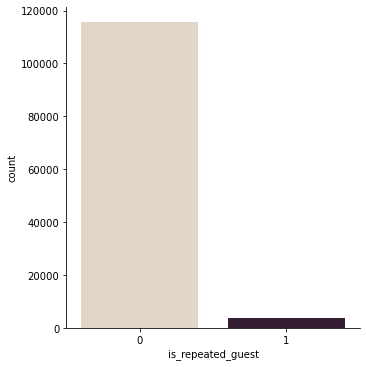

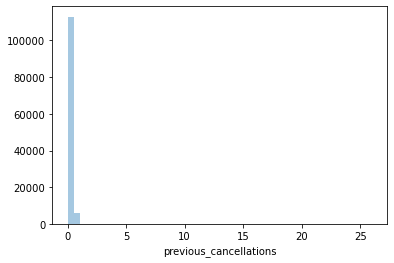

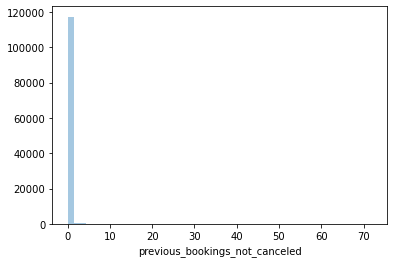

<Figure size 432x288 with 0 Axes>

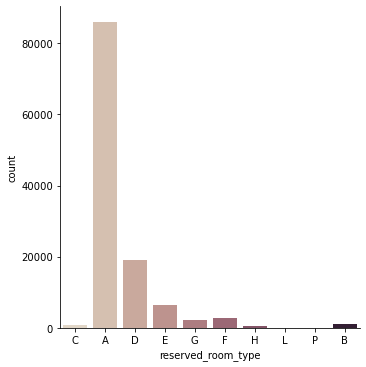

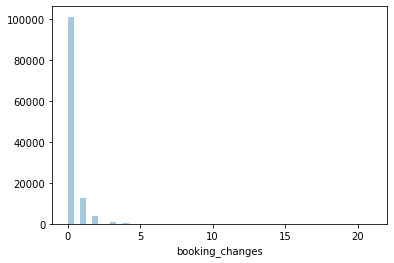

<Figure size 432x288 with 0 Axes>

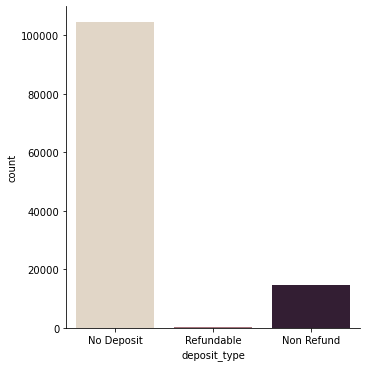

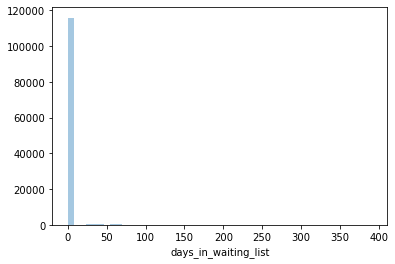

<Figure size 432x288 with 0 Axes>

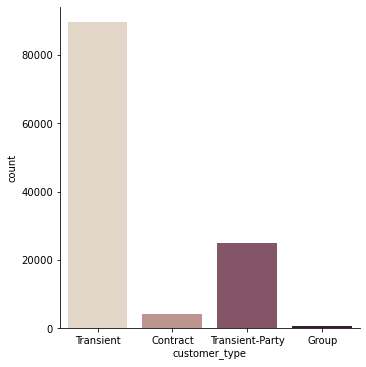

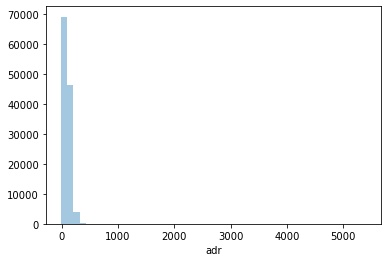

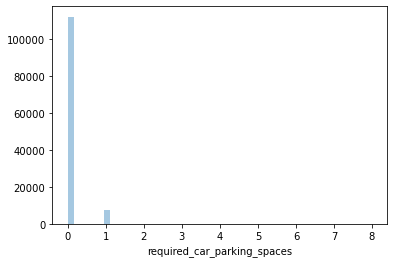

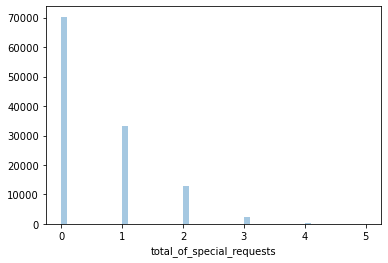

In [23]:

for i in range(1,len(temp.columns)):
    if(temp.dtypes[i] in ('float64','int64')):
        print(temp.columns[i])
        plt.figure()
        sns_plot = sns.distplot(temp[temp.columns[i]], kde=False)
        sns_plot.figure.savefig(temp.columns[i]+'.png')
    else:
        plt.figure()
        sns_plot = sns.catplot(x=temp.columns[i], kind="count", palette="ch:.25", data=temp)
        sns_plot.savefig(temp.columns[i]+'.png')




In [24]:
# Plotting All the Transformed Variables 
os.chdir('C:\\Users\\chethan mk\\Downloads\\AI&ML Training\\Boosting Techniques\\')
if not os.path.exists('Transformed Plots'):
    os.makedirs('Transformed Plots')
os.chdir('C:\\Users\\chethan mk\\Downloads\\AI&ML Training\\Boosting Techniques\\Transformed Plots')



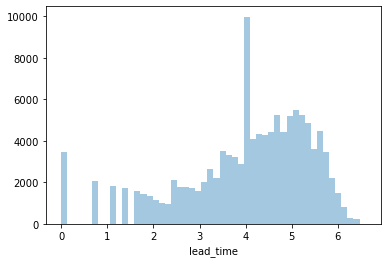

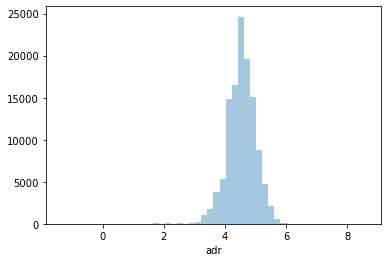

In [25]:
# Log transformation with mean Imputation for Non-Uniform Variables
log_mean_transform_var=['lead_time','adr']


import time
for i in range(0,len(temp.columns)):
    if(temp.columns[i] in log_mean_transform_var):
        logtransform=np.log(temp[temp.columns[i]])
        logtransform = logtransform.replace([np.inf, -np.inf], np.nan)
        logtransform = mean_imp.fit_transform(pd.DataFrame(logtransform))
        temp[temp.columns[i]]=logtransform
        temp[temp.columns[i]].fillna(0, inplace = True) 

for i in range(1,len(temp.columns)):
    if(temp.columns[i] in log_mean_transform_var):
        plt.figure()
        sns_plot = sns.distplot(temp[temp.columns[i]], kde=False)
        sns_plot.figure.savefig(temp.columns[i]+'.png')


Chethan MK

### Feature Selection

#### Numerical feature selection

In [26]:
numeric_variables = num_data.columns
numeric_variables

Index(['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights',
       'adults', 'children', 'babies', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests'],
      dtype='object')

In [27]:
temp.describe()

,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,3.994735,0.927599,2.500302,1.856403,0.103890,0.007949,0.087118,0.137097,0.221124,2.321149,4.539002,0.062518,0.571363
std,1.429553,0.998613,1.908286,0.579261,0.398555,0.097436,0.844336,1.497437,0.652306,17.594721,0.462198,0.245291,0.792798
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.347074,0.000000,0.000000
25%,3.295837,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.265914,0.000000,0.000000
50%,4.234107,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.549393,0.000000,0.000000
75%,5.075174,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.836282,0.000000,1.000000
max,6.602588,19.000000,50.000000,55.000000,10.000000,10.000000,26.000000,72.000000,21.000000,391.000000,8.594154,8.000000,5.000000


In [28]:
# Create correlation matrix
corr_matrix = temp[numeric_variables].corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.7 & less than -0.7
to_drop_pos = [column for column in upper.columns if any(upper[column] > 0.7)]
to_drop_neg = [column for column in upper.columns if any(upper[column] < -0.7)]
print(to_drop_neg)
print(to_drop_pos)

[]
[]


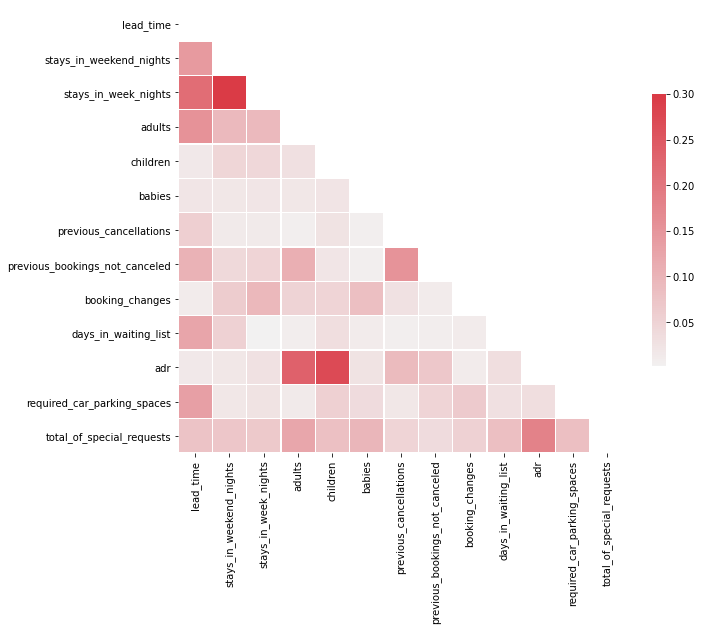

In [29]:
plt.figure(figsize=(10,10))
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=np.bool))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns_plot=sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
sns_plot.figure.savefig('correlation.png')
# Fill na values with Numeric value as 0
for i in range(1,len(temp.columns)):
    if(temp.dtypes[i] in ('float64','int64')):
        temp[temp.columns[i]].fillna(0, inplace = True) 


In [30]:
# Drop NaN Value from the temp variable
        
temp=temp.dropna(how='any') 

X = temp.drop(temp.columns[1],axis=1)
y = temp[temp.columns[1]]
y =np.where(y =='0',0,1)
# Identify Numeric Values separately
#num_only=set(numeric_variables).difference(categoric_variables)

In [31]:
numeric_variables

Index(['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights',
       'adults', 'children', 'babies', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests'],
      dtype='object')

In [32]:

# Decision tree with gini 
dt_model_num = DecisionTreeClassifier() 
  
# Performing training 
dt_model_num.fit(X[numeric_variables], y)

DecisionTreeClassifier()

In [33]:
print(dt_model_num.feature_importances_)

[0.31377605 0.04705926 0.08419545 0.02802842 0.01361105 0.00163069
 0.07693982 0.01695888 0.04333481 0.0101143  0.27552245 0.0229107
 0.06591812]


In [34]:
dt_p_values_num = pd.Series(dt_model_num.feature_importances_,index = X[numeric_variables].columns)
dt_p_values_num.sort_values(ascending = False , inplace = True)
dt_p_values_num

lead_time                         0.313776
adr                               0.275522
stays_in_week_nights              0.084195
previous_cancellations            0.076940
total_of_special_requests         0.065918
stays_in_weekend_nights           0.047059
booking_changes                   0.043335
adults                            0.028028
required_car_parking_spaces       0.022911
previous_bookings_not_canceled    0.016959
children                          0.013611
days_in_waiting_list              0.010114
babies                            0.001631
dtype: float64

{'babies'}


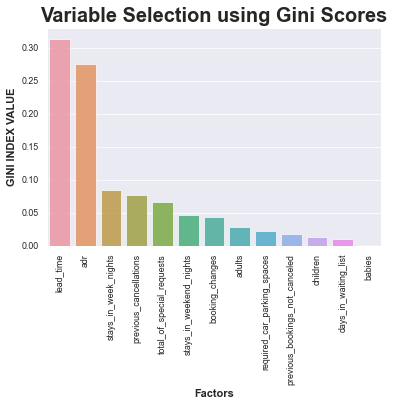

In [35]:

plt.figure()
sns.set(rc={'figure.figsize':(11.7,8.27)})
pal = sns.color_palette("Greens_d")
sns.set_context("paper")
sns_plot = sns.barplot(dt_p_values_num.index[dt_p_values_num>0],dt_p_values_num[dt_p_values_num>0],alpha = 0.85)
plt.xticks(rotation=90)
plt.xlabel('Factors', fontsize = 11, weight = 'bold')
plt.ylabel('GINI INDEX VALUE', fontsize = 11, weight = 'bold')
sns_plot.set_title("Variable Selection using Gini Scores", fontsize = 20, weight = 'bold')
sns_plot.figure.savefig('GINI_INDEX'+'.png')

dt_selected_num=dt_p_values_num.index[dt_p_values_num>0.01]
dt_rejected_num=set(X[numeric_variables].columns.values).difference(dt_selected_num)
print(dt_rejected_num)

#### categorical feature selection

[0.02314125 0.05537241 0.01927682 0.11778814 0.02412427 0.01020358
 0.02835215 0.67796517 0.04377621]
Index([], dtype='object')


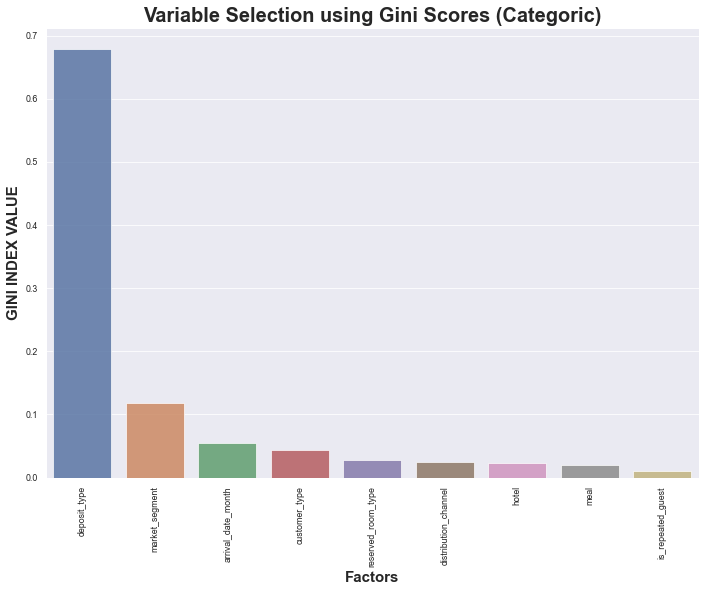

In [36]:
#temp.iloc[:,[0,1,3,9,10,11,12,15,17,19]] = temp.iloc[:,[0,1,3,9,10,11,12,15,17,19]].astype('str')

# Selecting Categorical Variables alone for Variable Selection
t=temp.iloc[:,[0,1,3,9,10,11,12,15,17,19]]
# Dropping off NaN Values if Any
t=t.dropna(how='any')
del t['is_canceled']
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
for i in range(0,len(t.columns)):
    t.iloc[:,i] = le.fit_transform(t.iloc[:,i])
# Using GINI to decide Variables for Categoric Variables

dt_model_cat = DecisionTreeClassifier()
dt_model_cat.fit(t, y) 
print(dt_model_cat.feature_importances_)
dt_p_values_cat = pd.Series(dt_model_cat.feature_importances_,index = t.columns)
dt_p_values_cat.sort_values(ascending = False , inplace = True)
dt_p_values_cat.index
plt.figure()
sns.set(rc={'figure.figsize':(11.7,8.27)})
pal = sns.color_palette("Greens_d")
sns.set_context("paper")
sns_plot = sns.barplot(dt_p_values_cat.index,dt_p_values_cat,alpha = 0.85)
plt.xticks(rotation=90)
plt.xlabel('Factors', fontsize = 15, weight = 'bold')
plt.ylabel('GINI INDEX VALUE', fontsize = 15, weight = 'bold')
sns_plot.set_title("Variable Selection using Gini Scores (Categoric)", fontsize = 20, weight = 'bold')
sns_plot.figure.savefig('GINI_INDEX_Categoric'+'.png')

dt_selected_cat=dt_p_values_cat.index[dt_p_values_cat>0.0]
dt_rejected_cat=dt_p_values_cat.index[dt_p_values_cat==0]


print(dt_rejected_cat)

In [37]:
rejected_variables=[]
rejected_variables.extend(to_drop_pos)
rejected_variables.extend(to_drop_neg)
rejected_variables.extend(dt_rejected_num)
rejected_variables.extend(dt_rejected_cat)


In [38]:
rejected_variables

['babies']

In [39]:
print(set(temp.columns).difference(rejected_variables))

final_selection=set(temp.columns).difference(rejected_variables)
final_selection.remove('is_canceled')

#cat_vars=set(set(final_selection).difference(rejected_variables_filter)).difference(numeric_variables)
#cat_vars1=cat_vars
#final_selection=set(final_selection).difference(cat_vars1)


{'stays_in_weekend_nights', 'required_car_parking_spaces', 'distribution_channel', 'total_of_special_requests', 'previous_bookings_not_canceled', 'children', 'is_repeated_guest', 'meal', 'previous_cancellations', 'is_canceled', 'deposit_type', 'days_in_waiting_list', 'stays_in_week_nights', 'reserved_room_type', 'adr', 'adults', 'lead_time', 'hotel', 'market_segment', 'customer_type', 'arrival_date_month', 'booking_changes'}


In [40]:
temp[final_selection].head()

,stays_in_weekend_nights,required_car_parking_spaces,distribution_channel,total_of_special_requests,previous_bookings_not_canceled,children,is_repeated_guest,meal,previous_cancellations,deposit_type,days_in_waiting_list,stays_in_week_nights,reserved_room_type,adr,adults,lead_time,hotel,market_segment,customer_type,arrival_date_month,booking_changes
0,0,0,Direct,0,0,0.0,0,BB,0,No Deposit,0,0,C,4.539002,2.0,5.834811,Resort Hotel,Direct,Transient,July,3
1,0,0,Direct,0,0,0.0,0,BB,0,No Deposit,0,0,C,4.539002,2.0,6.602588,Resort Hotel,Direct,Transient,July,4
2,0,0,Direct,0,0,0.0,0,BB,0,No Deposit,0,1,A,4.317488,1.0,1.945910,Resort Hotel,Direct,Transient,July,0
3,0,0,Corporate,0,0,0.0,0,BB,0,No Deposit,0,1,A,4.317488,1.0,2.564949,Resort Hotel,Corporate,Transient,July,0
4,0,0,TA/TO,1,0,0.0,0,BB,0,No Deposit,0,2,A,4.584967,2.0,2.639057,Resort Hotel,Online TA,Transient,July,0


In [41]:
temp[final_selection].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119390 entries, 0 to 119389
Data columns (total 21 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   stays_in_weekend_nights         119390 non-null  int64  
 1   required_car_parking_spaces     119390 non-null  int64  
 2   distribution_channel            119390 non-null  object 
 3   total_of_special_requests       119390 non-null  int64  
 4   previous_bookings_not_canceled  119390 non-null  int64  
 5   children                        119390 non-null  float64
 6   is_repeated_guest               119390 non-null  object 
 7   meal                            119390 non-null  object 
 8   previous_cancellations          119390 non-null  int64  
 9   deposit_type                    119390 non-null  object 
 10  days_in_waiting_list            119390 non-null  int64  
 11  stays_in_week_nights            119390 non-null  int64  
 12  reserved_room_ty

#### One Hot Encoding

In [42]:
num_data = temp[temp.columns[temp.dtypes!='object']]
cat_data = temp[temp.columns[temp.dtypes=='object']]
del cat_data['is_canceled']

In [43]:
num_data.head()

,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
0,5.834811,0,0,2.0,0.0,0,0,0,3,0,4.539002,0,0
1,6.602588,0,0,2.0,0.0,0,0,0,4,0,4.539002,0,0
2,1.945910,0,1,1.0,0.0,0,0,0,0,0,4.317488,0,0
3,2.564949,0,1,1.0,0.0,0,0,0,0,0,4.317488,0,0
4,2.639057,0,2,2.0,0.0,0,0,0,0,0,4.584967,0,1


In [44]:
cat_data.head()

,hotel,arrival_date_month,meal,market_segment,distribution_channel,is_repeated_guest,reserved_room_type,deposit_type,customer_type
0,Resort Hotel,July,BB,Direct,Direct,0,C,No Deposit,Transient
1,Resort Hotel,July,BB,Direct,Direct,0,C,No Deposit,Transient
2,Resort Hotel,July,BB,Direct,Direct,0,A,No Deposit,Transient
3,Resort Hotel,July,BB,Corporate,Corporate,0,A,No Deposit,Transient
4,Resort Hotel,July,BB,Online TA,TA/TO,0,A,No Deposit,Transient


In [45]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(sparse = False)
dummydata = enc.fit_transform(cat_data)
dummydata = pd.DataFrame(dummydata)
names = enc.get_feature_names(input_features=list(cat_data.columns))
dummydata.columns = names
dummydata.head()

,hotel_City Hotel,hotel_Resort Hotel,arrival_date_month_April,arrival_date_month_August,arrival_date_month_December,arrival_date_month_February,arrival_date_month_January,arrival_date_month_July,arrival_date_month_June,arrival_date_month_March,arrival_date_month_May,arrival_date_month_November,arrival_date_month_October,arrival_date_month_September,meal_BB,meal_FB,meal_HB,meal_SC,meal_Undefined,market_segment_Aviation,market_segment_Complementary,market_segment_Corporate,market_segment_Direct,market_segment_Groups,market_segment_Offline TA/TO,market_segment_Online TA,market_segment_Undefined,distribution_channel_Corporate,distribution_channel_Direct,distribution_channel_GDS,distribution_channel_TA/TO,distribution_channel_Undefined,is_repeated_guest_0,is_repeated_guest_1,reserved_room_type_A,reserved_room_type_B,reserved_room_type_C,reserved_room_type_D,reserved_room_type_E,reserved_room_type_F,reserved_room_type_G,reserved_room_type_H,reserved_room_type_L,reserved_room_type_P,deposit_type_No Deposit,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [46]:
dummydata=dummydata.reset_index(drop=True)
num_data=num_data.reset_index(drop=True)
X_log=pd.concat([num_data,dummydata], axis=1)


In [47]:
X_log.head()

,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,hotel_City Hotel,hotel_Resort Hotel,arrival_date_month_April,arrival_date_month_August,arrival_date_month_December,arrival_date_month_February,arrival_date_month_January,arrival_date_month_July,arrival_date_month_June,arrival_date_month_March,arrival_date_month_May,arrival_date_month_November,arrival_date_month_October,arrival_date_month_September,meal_BB,meal_FB,meal_HB,meal_SC,meal_Undefined,market_segment_Aviation,market_segment_Complementary,market_segment_Corporate,market_segment_Direct,market_segment_Groups,market_segment_Offline TA/TO,market_segment_Online TA,market_segment_Undefined,distribution_channel_Corporate,distribution_channel_Direct,distribution_channel_GDS,distribution_channel_TA/TO,distribution_channel_Undefined,is_repeated_guest_0,is_repeated_guest_1,reserved_room_type_A,reserved_room_type_B,reserved_room_type_C,reserved_room_type_D,reserved_room_type_E,reserved_room_type_F,reserved_room_type_G,reserved_room_type_H,reserved_room_type_L,reserved_room_type_P,deposit_type_No Deposit,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
0,5.834811,0,0,2.0,0.0,0,0,0,3,0,4.539002,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,6.602588,0,0,2.0,0.0,0,0,0,4,0,4.539002,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.945910,0,1,1.0,0.0,0,0,0,0,0,4.317488,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,2.564949,0,1,1.0,0.0,0,0,0,0,0,4.317488,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,2.639057,0,2,2.0,0.0,0,0,0,0,0,4.584967,0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


### Modelling and Validation  AdaBoostClassifier

In [48]:
RANDOM_SEED = 30
X_train, X_test, y_train, y_test = train_test_split(X_log, y, test_size=0.33, random_state=RANDOM_SEED)

In [49]:
%%time
#Training the model on the train data
clf = AdaBoostClassifier(n_estimators=10, random_state=0)
print('Parameters currently in use:\n')
print(clf.get_params())
clf.fit(X_train,y_train)

Parameters currently in use:

{'algorithm': 'SAMME.R', 'base_estimator': None, 'learning_rate': 1.0, 'n_estimators': 10, 'random_state': 0}
Wall time: 1.38 s


AdaBoostClassifier(n_estimators=10, random_state=0)

In [50]:
%%time
#Predict the response for train dataset
y_pred_train = clf.predict(X_train)
#Predict the response for test dataset
y_pred_test= clf.predict(X_test)


Wall time: 538 ms


In [51]:
confusion_matrix_train = confusion_matrix(y_train, y_pred_train)

print( "confusion_matrix train data\n\n",confusion_matrix_train,"\n")


confusion_matrix train data

 [[46971  3510]
 [11919 17591]] 



In [52]:
print( "Classification report train data\n\n" ,classification_report(y_train, y_pred_train))
#macro average (averaging the unweighted mean per label),
#weighted average (averaging the support-weighted mean     per label),
#binary classification, recall of the positive class
#is also known as "sensitivity"; recall of the negative class is"specificity".

Classification report train data

               precision    recall  f1-score   support

           0       0.80      0.93      0.86     50481
           1       0.83      0.60      0.70     29510

    accuracy                           0.81     79991
   macro avg       0.82      0.76      0.78     79991
weighted avg       0.81      0.81      0.80     79991



In [53]:
confusion_matrix_test = confusion_matrix(y_test, y_pred_test)

print( "confusion_matrix train data\n\n",confusion_matrix_test,"\n")
tn, fp, fn, tp = confusion_matrix_test.ravel()
print('true negative',tn)
print('false positive',fp)
print('false negative',fn)
print('true positive',tp)


confusion_matrix train data

 [[23008  1677]
 [ 5941  8773]] 

true negative 23008
false positive 1677
false negative 5941
true positive 8773


In [54]:
print( "Classification report train data\n\n" ,classification_report(y_test, y_pred_test))
#macro average (averaging the unweighted mean per label),
#weighted average (averaging the support-weighted mean     per label),
#binary classification, recall of the positive class
#is also known as "sensitivity"; recall of the negative class is"specificity".
print("--------------------accuracy score--------------")
accuracy_score(y_test, y_pred_test)

Classification report train data

               precision    recall  f1-score   support

           0       0.79      0.93      0.86     24685
           1       0.84      0.60      0.70     14714

    accuracy                           0.81     39399
   macro avg       0.82      0.76      0.78     39399
weighted avg       0.81      0.81      0.80     39399

--------------------accuracy score--------------


0.8066448387014898

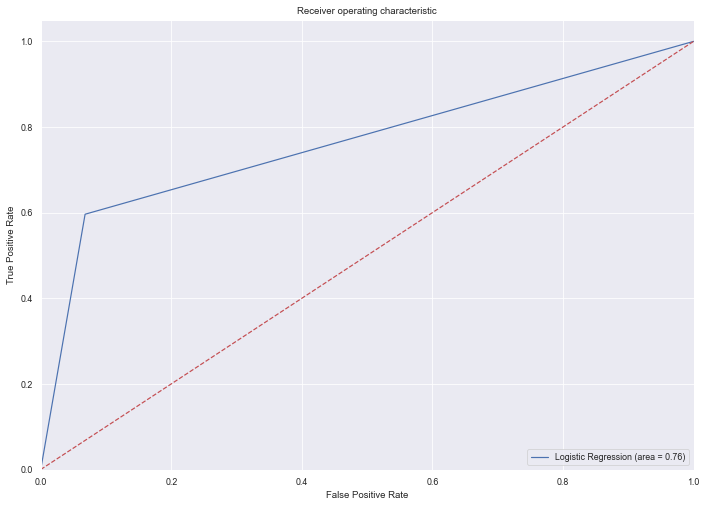

In [55]:

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, y_pred_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

### Modelling and Validation  GBM

In [56]:
RANDOM_SEED = 30
X_train, X_test, y_train, y_test = train_test_split(X_log, y, test_size=0.33, random_state=RANDOM_SEED)

In [57]:
%%time
#Training the model on the train data
clf = GradientBoostingClassifier(verbose=1,n_estimators= 10)
clf.fit(X_train,y_train)

      Iter       Train Loss   Remaining Time 
         1           1.2546            2.31s
         2           1.2058            1.85s
         3           1.1700            1.45s
         4           1.1374            1.17s
         5           1.1120            0.92s
         6           1.0893            0.71s
         7           1.0697            0.52s
         8           1.0524            0.35s
         9           1.0349            0.18s
        10           1.0198            0.00s
Wall time: 1.79 s


GradientBoostingClassifier(n_estimators=10, verbose=1)

In [58]:
%%time
#Predict the response for train dataset
y_pred_train = clf.predict(X_train)
#Predict the response for test dataset
y_pred_test= clf.predict(X_test)


Wall time: 112 ms


In [59]:
confusion_matrix_train = confusion_matrix(y_train, y_pred_train)

print( "confusion_matrix train data\n\n",confusion_matrix_train,"\n")


confusion_matrix train data

 [[50406    75]
 [18470 11040]] 



In [60]:
print( "Classification report train data\n\n" ,classification_report(y_train, y_pred_train))
#macro average (averaging the unweighted mean per label),
#weighted average (averaging the support-weighted mean     per label),
#binary classification, recall of the positive class
#is also known as "sensitivity"; recall of the negative class is"specificity".

Classification report train data

               precision    recall  f1-score   support

           0       0.73      1.00      0.84     50481
           1       0.99      0.37      0.54     29510

    accuracy                           0.77     79991
   macro avg       0.86      0.69      0.69     79991
weighted avg       0.83      0.77      0.73     79991



In [61]:
confusion_matrix_test = confusion_matrix(y_test, y_pred_test)

print( "confusion_matrix train data\n\n",confusion_matrix_test,"\n")
tn, fp, fn, tp = confusion_matrix_test.ravel()
print('true negative',tn)
print('false positive',fp)
print('false negative',fn)
print('true positive',tp)


confusion_matrix train data

 [[24649    36]
 [ 9202  5512]] 

true negative 24649
false positive 36
false negative 9202
true positive 5512


In [62]:
print( "Classification report train data\n\n" ,classification_report(y_test, y_pred_test))
#macro average (averaging the unweighted mean per label),
#weighted average (averaging the support-weighted mean     per label),
#binary classification, recall of the positive class
print("--------------------accuracy score--------------")
accuracy_score(y_test, y_pred_test)

Classification report train data

               precision    recall  f1-score   support

           0       0.73      1.00      0.84     24685
           1       0.99      0.37      0.54     14714

    accuracy                           0.77     39399
   macro avg       0.86      0.69      0.69     39399
weighted avg       0.83      0.77      0.73     39399

--------------------accuracy score--------------


0.7655270438335998

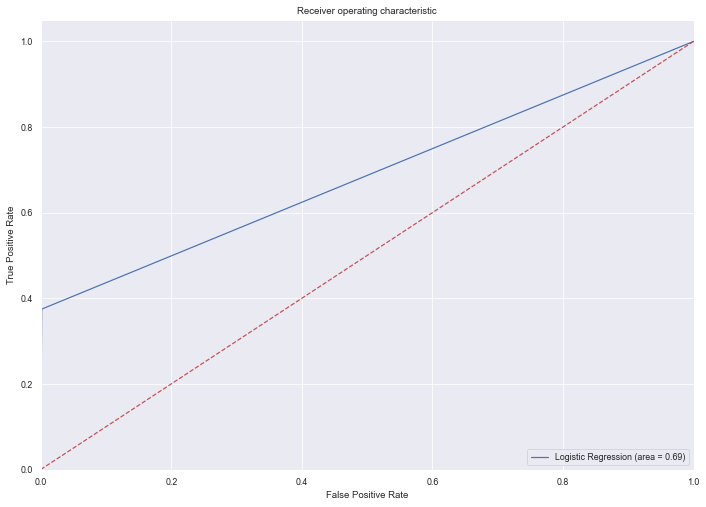

In [63]:

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, y_pred_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

### XGBoosting

In [64]:
!pip install xgboost

In [65]:
from xgboost import XGBClassifier

In [66]:
import multiprocessing
multiprocessing.cpu_count() # returns numbers of CPUs in system , i.e. logical processors

4

In [67]:
RANDOM_SEED = 30
X_train, X_test, y_train, y_test = train_test_split(X_log, y, test_size=0.33, random_state=RANDOM_SEED)

In [68]:
%%time
#Training the model on the train data
clf = XGBClassifier(n_jobs = 1,n_estimators= 10,max_depth=3 ) #n_jobs :Number of parallel threads used to run xgboost. 
#print('Parameters currently in use:\n')
#print(clf.get_params())
clf.fit(X_train,y_train)


[16:31:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Wall time: 1.46 s


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=10, n_jobs=1, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [69]:
%%time
#Training the model on the train data
clf = XGBClassifier(n_jobs = 2,n_estimators= 10,max_depth=3 )
#print('Parameters currently in use:\n')
#print(clf.get_params())
clf.fit(X_train,y_train)

[16:31:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Wall time: 910 ms


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=10, n_jobs=2, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [70]:
%%time
#Training the model on the train data
clf = XGBClassifier(n_jobs = -1,n_estimators= 10,max_depth=3 )
#print('Parameters currently in use:\n')
#print(clf.get_params())
clf.fit(X_train,y_train)

[16:31:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Wall time: 559 ms


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=10, n_jobs=-1, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [71]:
%%time
#Predict the response for train dataset
y_pred_train = clf.predict(X_train)
#Predict the response for test dataset
y_pred_test= clf.predict(X_test)


Wall time: 146 ms


In [72]:
confusion_matrix_train = confusion_matrix(y_train, y_pred_train)

print( "confusion_matrix train data\n\n",confusion_matrix_train,"\n")


confusion_matrix train data

 [[48571  1910]
 [14068 15442]] 



In [73]:
print( "Classification report train data\n\n" ,classification_report(y_train, y_pred_train))
#macro average (averaging the unweighted mean per label),
#weighted average (averaging the support-weighted mean     per label),
#binary classification, recall of the positive class
#is also known as "sensitivity"; recall of the negative class is"specificity".

Classification report train data

               precision    recall  f1-score   support

           0       0.78      0.96      0.86     50481
           1       0.89      0.52      0.66     29510

    accuracy                           0.80     79991
   macro avg       0.83      0.74      0.76     79991
weighted avg       0.82      0.80      0.79     79991



In [74]:
confusion_matrix_test = confusion_matrix(y_test, y_pred_test)

print( "confusion_matrix train data\n\n",confusion_matrix_test,"\n")
tn, fp, fn, tp = confusion_matrix_test.ravel()
print('true negative',tn)
print('false positive',fp)
print('false negative',fn)
print('true positive',tp)


confusion_matrix train data

 [[23769   916]
 [ 6990  7724]] 

true negative 23769
false positive 916
false negative 6990
true positive 7724


In [75]:
print( "Classification report train data\n\n" ,classification_report(y_test, y_pred_test))
#macro average (averaging the unweighted mean per label),
#weighted average (averaging the support-weighted mean     per label),
#binary classification, recall of the positive class
#is also known as "sensitivity"; recall of the negative class is"specificity".
print("--------------------accuracy score--------------")
accuracy_score(y_test, y_pred_test)

Classification report train data

               precision    recall  f1-score   support

           0       0.77      0.96      0.86     24685
           1       0.89      0.52      0.66     14714

    accuracy                           0.80     39399
   macro avg       0.83      0.74      0.76     39399
weighted avg       0.82      0.80      0.78     39399

--------------------accuracy score--------------


0.7993350085027539

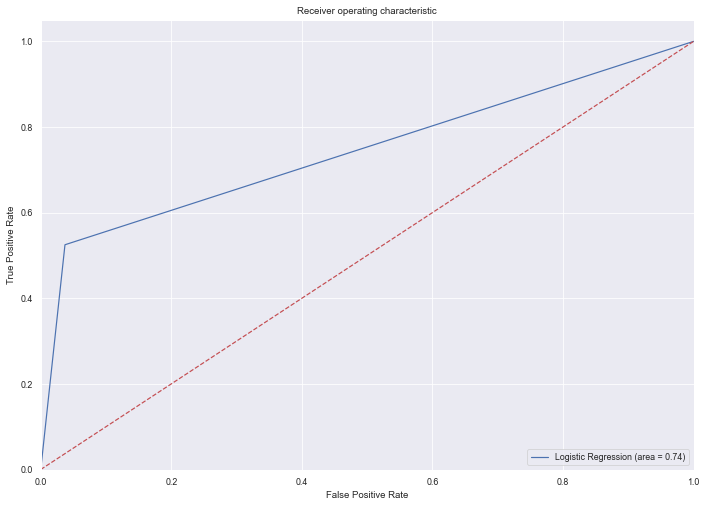

In [76]:

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, y_pred_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

### Modelling and Validation  More than 1 XGboost parameters

In [77]:
RANDOM_SEED = 30
X_train, X_test, y_train, y_test = train_test_split(X_log, y, test_size=0.33, random_state=RANDOM_SEED)


In [78]:
%%time

# Let's first try a simple model to make a benchmark for our model performance
from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeClassifier
scoring = ['precision_macro','recall_macro','accuracy']
depth1 = pd.DataFrame(columns = ['test_accuracy','test_precision_macro','test_recall_macro','Max_depth','n_estimators','learning_rate'])
max_depth = [3,10] # for demo use less number of estimators
n_estimators= [10,50,100] # for demo use less number of estimators
learning_rate=[0.1,0.3] # for demo use less number of learning rates
for k in n_estimators:
    for j in learning_rate:
        for i in max_depth:
            clf = XGBClassifier(n_estimators =k, max_depth = i,learning_rate = j,random_state=0)
            scores = cross_validate(estimator = clf,X=X_train, y=y_train,cv=3,scoring=scoring)
            a = pd.DataFrame(scores)
            a = a[['test_accuracy','test_precision_macro','test_recall_macro']]
            a['Max_depth']=i
            a['n_estimators']=k
            a['learning_rate']=j
            depth1 = pd.concat([a,depth1],axis=0)
depth1[['Max_depth','n_estimators','learning_rate','test_accuracy','test_precision_macro','test_recall_macro']][depth1['test_accuracy'] ==depth1['test_accuracy'].max()] 



[16:31:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:31:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:31:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:31:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[16:32:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:32:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:32:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:32:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

,Max_depth,n_estimators,learning_rate,test_accuracy,test_precision_macro,test_recall_macro
0,10,100,0.3,0.848147,0.844168,0.824917


In [79]:
# Create Decision Tree classifer object
clf = XGBClassifier(n_estimators =100, max_depth = 10,learning_rate = 0.3,random_state=0)
# Fit the random search model
clf.fit(X_train,y_train)
y_pred_test = clf.predict(X_test)



[16:33:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [80]:
confusion_matrix_test = confusion_matrix(y_test, y_pred_test)

print( "confusion_matrix train data\n\n",confusion_matrix_test,"\n")
tn, fp, fn, tp = confusion_matrix_test.ravel()
print('true negative',tn)
print('false positive',fp)
print('false negative',fn)
print('true positive',tp)


confusion_matrix train data

 [[22739  1946]
 [ 3900 10814]] 

true negative 22739
false positive 1946
false negative 3900
true positive 10814


In [81]:
print( "Classification report train data\n\n" ,classification_report(y_test, y_pred_test))
#macro average (averaging the unweighted mean per label),
#weighted average (averaging the support-weighted mean     per label),
#binary classification, recall of the positive class
#is also known as "sensitivity"; recall of the negative class is"specificity".
print("--------------------accuracy score--------------")
accuracy_score(y_test, y_pred_test)

Classification report train data

               precision    recall  f1-score   support

           0       0.85      0.92      0.89     24685
           1       0.85      0.73      0.79     14714

    accuracy                           0.85     39399
   macro avg       0.85      0.83      0.84     39399
weighted avg       0.85      0.85      0.85     39399

--------------------accuracy score--------------


0.8516205995076017

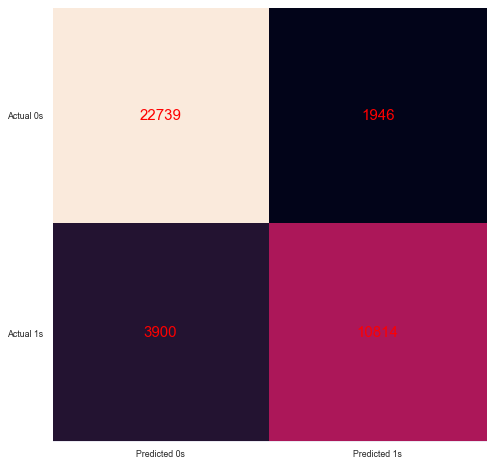

In [82]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(confusion_matrix_test)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, confusion_matrix_test[i, j], ha='center', va='center', color='red', fontsize=15)
plt.show()

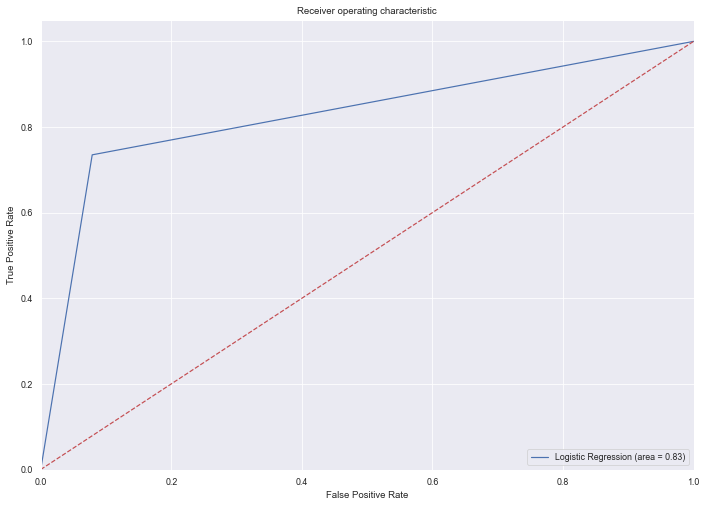

In [83]:

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, y_pred_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)
plt.figure()
plt.plot(fpr, tpr, label='Boosting Technique (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()